## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You should download the data from GitHub in Day2 assessments (Titanic-Dataset.csv) dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [50]:
from IPython.display import clear_output

In [78]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown
%pip install catboost

clear_output()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,G6,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     206 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [61]:
# 1. Do we have missing values?
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nHandle Missing Values as needed.")
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Cabin       685
Embarked      2
dtype: int64

Handle Missing Values as needed.


In [55]:
#for Age i will use the Average
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [62]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode())

In [63]:
df['Embarked'] = df['Embarked'].dropna()

In [65]:
check_missing_values(df)

Missing Values per Column:
Cabin       685
Embarked      2
dtype: int64

Handle Missing Values as needed.


In [66]:
# 2. Do we have categorical columns?
def encode_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(df)

Categorical Columns: ['Sex', 'Cabin', 'Embarked']


In [67]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

Encoding column: Sex
Encoding column: Cabin
Encoding column: Embarked


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,145,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,147,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,147,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [68]:
# 4. Do we have duplicate samples?
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicate Samples: {duplicates}")
    if duplicates > 0:
        print("Dropping Duplicates...")
        df.drop_duplicates(inplace=True)
        print("Duplicates Dropped.")
    else:
        print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 107
Dropping Duplicates...
Duplicates Dropped.


In [70]:
check_duplicates(df)

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [71]:
# 4. Do we have different scales in the data?
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,145,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,0,5,29.1250,147,1
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,147,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [73]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Survived")  ### DON'T SCALE THE TARGET
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.319728,0.666667
1,1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.551020,0.000000
2,1,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.986395,0.666667
3,1,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.374150,0.666667
4,0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...
885,0,1.0,0.0,0.484795,0.000,0.833333,0.056848,1.000000,0.333333
887,1,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.204082,0.666667
888,0,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.000000,0.666667
889,1,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.408163,0.000000


In [74]:
X = df.drop("Survived",axis=1)
y = df['Survived']

In [79]:
# Training our Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [80]:
# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='rbf'),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "XGBoost Classifier": XGBClassifier(verbosity=0),
    "CatBoost Classifier": CatBoostClassifier(verbose=0)
}

In [84]:
for model_name, model in models.items():
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []

    # Stratified 5-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        # Split data into training and testing sets
        X_Train, X_Test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model.fit(X_Train, y_Train)
        # Predict on the test set
        y_pred = model.predict(X_Test)

        # Calculate metrics
        scores_accuracy.append(accuracy_score(y_Test, y_pred))
        scores_precision.append(precision_score(y_Test, y_pred, average='weighted'))
        scores_recall.append(recall_score(y_Test, y_pred, average='weighted'))
        scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))

    # Print the results
    print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
    print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
    print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
    print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
    print("\n")

Logistic Regression Accuracy: 0.7666
Logistic Regression Precision: 0.7665
Logistic Regression Recall: 0.7666
Logistic Regression F1-Score: 0.7652


Support Vector Machine Accuracy: 0.7870
Support Vector Machine Precision: 0.7994
Support Vector Machine Recall: 0.7870
Support Vector Machine F1-Score: 0.7776


Decision Tree Classifier Accuracy: 0.8048
Decision Tree Classifier Precision: 0.8163
Decision Tree Classifier Recall: 0.8048
Decision Tree Classifier F1-Score: 0.7987


Random Forest Classifier Accuracy: 0.7704
Random Forest Classifier Precision: 0.7714
Random Forest Classifier Recall: 0.7704
Random Forest Classifier F1-Score: 0.7682


XGBoost Classifier Accuracy: 0.7704
XGBoost Classifier Precision: 0.7733
XGBoost Classifier Recall: 0.7704
XGBoost Classifier F1-Score: 0.7684


CatBoost Classifier Accuracy: 0.8023
CatBoost Classifier Precision: 0.8042
CatBoost Classifier Recall: 0.8023
CatBoost Classifier F1-Score: 0.7983




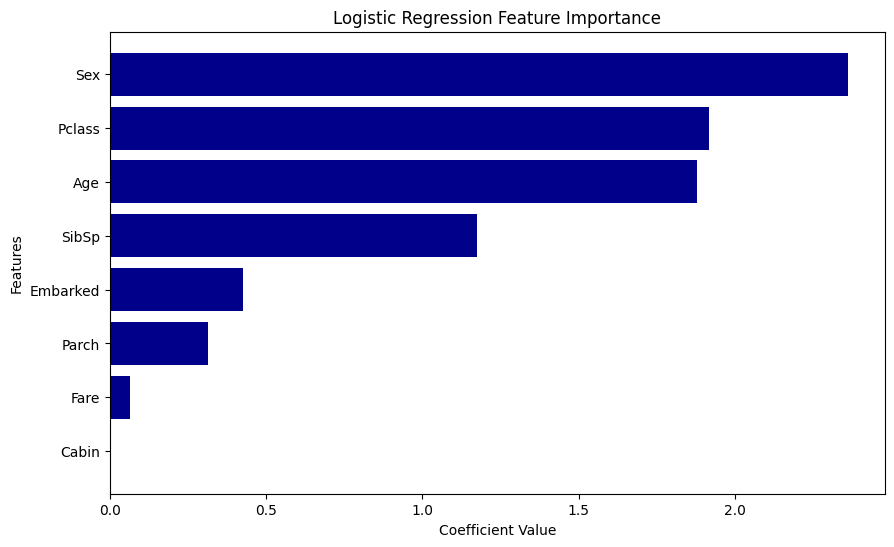

In [85]:
# Retrieve Logistic Regression coefficients and sort by absolute importance
logistic_importance = list(zip(X.columns, models["Logistic Regression"].coef_[0]))
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract sorted features and their coefficients
features, coefficients = zip(*sorted_logistic_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, np.abs(coefficients), color='darkblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

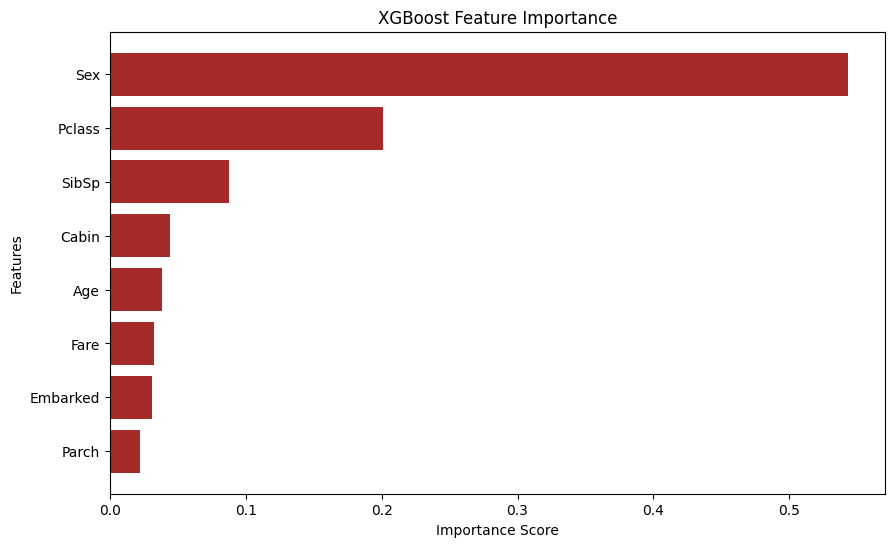

In [86]:
# Retrieve XGBoost feature importances
xgb_importances = models["XGBoost Classifier"].feature_importances_

# Create a sorted list of feature importance
sorted_idx = np.argsort(xgb_importances)[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importances = xgb_importances[sorted_idx]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='brown')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

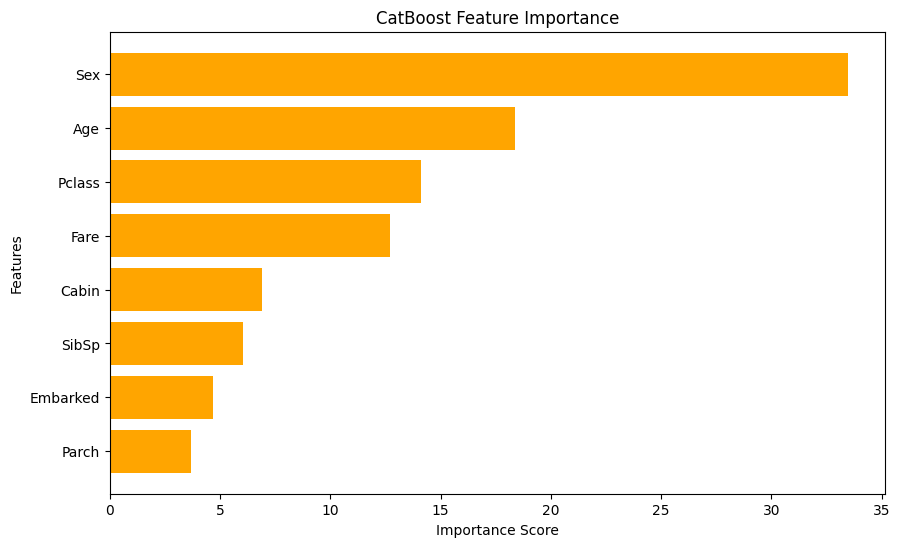

In [87]:
# Retrieve CatBoost feature importances and sort them
catboost_model = models["CatBoost Classifier"]
catboost_importance = list(zip(X.columns, catboost_model.feature_importances_))
sorted_catboost_importance = sorted(catboost_importance, key=lambda x: x[1], reverse=True)

# Extract features and their importances
features, importances = zip(*sorted_catboost_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()